In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib as plt
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# Read the AirPassengers dataset
airline = pd.read_csv(r'C:\Users\sr528\OneDrive\Desktop\hh\Sales.csv',
					index_col ='Month',
					parse_dates = True)

# Print the first five rows of the dataset
airline.head()

,Sales
Month,
2005-01-01,151315
2005-02-01,202307
2005-03-01,37392
2005-04-01,205863
2005-05-01,34875


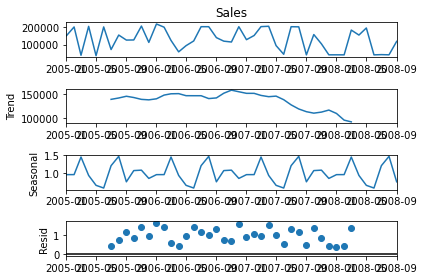

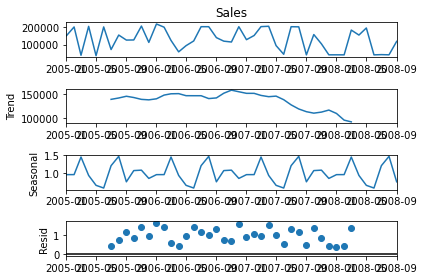

In [3]:
# ETS Decomposition
result = seasonal_decompose(airline['Sales'],
							model ='multiplicative')

# ETS plot
result.plot()

In [4]:
!pip install pmdarima

In [5]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(airline['Sales'], start_p = 1, start_q = 1,
						max_p = 3, max_q = 3, m = 12,
						start_P = 0, seasonal = True,
						d = None, D = 1, trace = True,
						error_action ='ignore', # we don't want to know if an order does not work
						suppress_warnings = True, # we don't want convergence warnings
						stepwise = True)		 # set to stepwise

# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=852.930, Time=0.30 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=848.625, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=852.291, Time=0.06 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=852.733, Time=0.04 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=849.278, Time=0.01 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=850.288, Time=0.03 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=850.263, Time=0.03 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=852.257, Time=0.07 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=850.671, Time=0.01 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=850.888, Time=0.03 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=852.570, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,1,0)[12] intercept
Total fit time: 0.632 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                        y   No. Observations:                   45
Model:             SARIMAX(0, 1, 0, 12)   Log Likelihood                -422.312
Date:                  Sun, 06 Feb 2022   AIC                            848.625
Time:                          23:33:12   BIC                            851.618
Sample:                               0   HQIC                           849.632
                                   - 45                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1.444e+04   1.52e+04     -0.947      0.344   -4.43e+04    1.54e+04
sigma2      7.641e+09    2.6e+09      2.936      0.003    2.54e+09    1.27e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 1.27
Prob(Q):                              0.83   Prob(JB):                         0.53
Heteroskedasticity (H):               1.35   Skew:                            -0.06
Prob(H) (two-sided):                  0.62   Kurtosis:                         2.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [6]:
# Split data into train / test sets
train = airline.iloc[:len(airline)-12]
test = airline.iloc[len(airline)-12:] # set one year(12 months) for testing

In [7]:
# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['Sales'],
				order = (0, 1, 1),
				seasonal_order =(2, 1, 1, 12))

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   33
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -255.281
Date:                            Sun, 06 Feb 2022   AIC                            520.562
Time:                                    23:33:12   BIC                            525.541
Sample:                                01-01-2005   HQIC                           521.534
                                     - 09-01-2007                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7104      0.317     -2.243      0.025      -1.331      -0.090
ar.S.L12      -0.6498   2.51e+04  -2.59e-05      1.000   -4.92e+04    4.92e+04
ar.S.L24      -0.4049   1.16e+04  -3.49e-05      1.000   -2.28e+04    2.28e+04
ma.S.L12   -7.875e-05      3e+04  -2.62e-09      1.000   -5.88e+04    5.88e+04
sigma2       9.17e+09      0.230   3.99e+10      0.000    9.17e+09    9.17e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):                 0.67
Prob(Q):                              0.54   Prob(JB):                         0.71
Heteroskedasticity (H):               1.08   Skew:                            -0.08
Prob(H) (two-sided):                  0.92   Kurtosis:                         2.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.46e+26. Standard errors may be unstable.
"""

<AxesSubplot:xlabel='Month'>

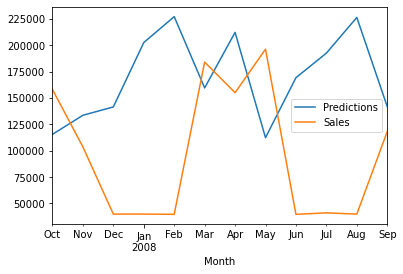

In [8]:
start = len(train)
end = len(train) + len(test) - 1

# Predictions for one-year against the test set
predictions = result.predict(start, end,
							typ = 'levels').rename("Predictions")

# plot predictions and actual values
predictions.plot(legend = True)
test['Sales'].plot(legend = True)

In [9]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
rmse(test["Sales"], predictions)

# Calculate mean squared error
mean_squared_error(test["Sales"], predictions)

# Train the model on the full dataset
model = SARIMAX(airline['Sales'],
						order = (0, 1, 1),
						seasonal_order =(2, 1, 1, 12))
result = model.fit()

<AxesSubplot:xlabel='Month'>

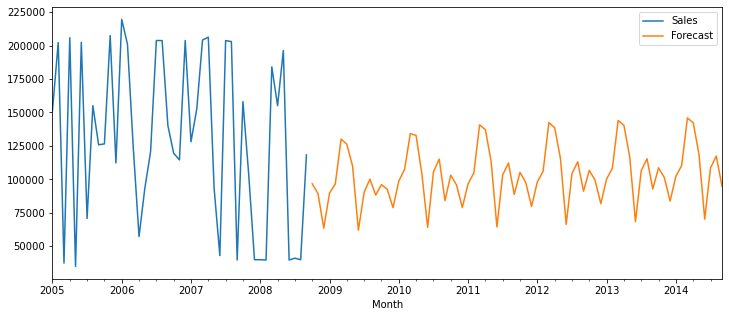

In [10]:
forecast = result.predict(start = len(airline),
						end = (len(airline)-1) + 6 * 12,
						typ = 'levels').rename('Forecast')

# Plot the forecast values
airline['Sales'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)


In [11]:
forecast = result.predict(start = len(airline),
						end = (len(airline)-1) + 6 * 12,
						typ = 'levels').rename('Forecast')


In [12]:
ts = airline["Sales"]

In [13]:
a = pd.DataFrame(ts)

In [14]:
#px.line(airline, template = 'plotly_dark')
#px.line(forecast, template = 'plotly_dark')

In [15]:
px.line(airline["Sales"],template = 'plotly_dark')

In [16]:

px.line(forecast,template = 'plotly_dark')

In [17]:
 #forecast = result.predict(start = 508, end =533, dynamic =True)
 #px.line(result, x='Month', y= ['Price','forecast'],template = 'plotly_dark')

In [18]:
forecast = result.predict(start = len(airline),
						end = (len(airline)-1) + 6 * 12,
						typ = 'levels', dynamic =True).rename('Forecast') 
px.line(forecast,  template = 'plotly_dark')

In [19]:
import plotly.express as px

import pandas as pd

fig = px.line(forecast)
fig.show()

In [20]:
import plotly.express as px
df = px.data.stocks()
fig = px.line(forecast,
              title='custom tick labels with ticklabelmode="period"')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y",
    ticklabelmode="period")
fig.show()

In [21]:
a = pd.concat([airline,forecast],axis=1)

In [22]:
a

,Sales,Forecast
2005-01-01,151315.0,NaN
2005-02-01,202307.0,NaN
2005-03-01,37392.0,NaN
2005-04-01,205863.0,NaN
2005-05-01,34875.0,NaN
...,...,...
2014-05-01,NaN,118921.468296
2014-06-01,NaN,70256.135644
2014-07-01,NaN,108528.000575
2014-08-01,NaN,117418.374091


In [23]:
#a.to_csv("Salesprection.csv")

In [24]:

px.line(a,template = 'plotly_dark')